In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
)

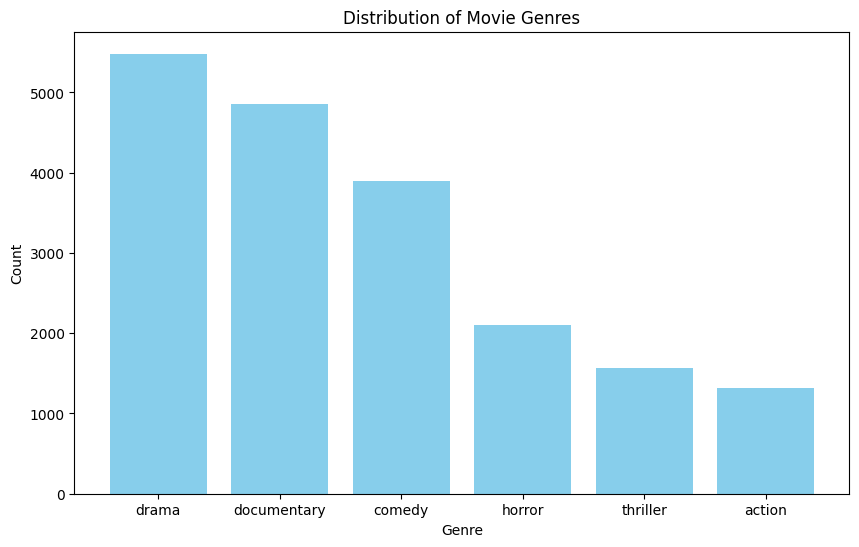

In [10]:
# Load the training data
train_data = pd.read_csv("train.csv")

# Count the occurrences of each genre
genre_counts = train_data["genre"].value_counts()


# Plot the distribution of genres
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color="skyblue")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Movie Genres")
plt.xticks(genre_counts.index, genre_counts.index.tolist())
plt.show()

Drama and documentary genres are the most common, with 5483 and 4861
occurrences, respectively. Comedy is the third most common genre with 3896
occurrences.Horror, thriller, and action genres have fewer occurrences compared
to drama, documentary, and comedy, with 2104, 1568, and 1312 occurrences,
respectively. The distribution of the dataset is imbalanced, with drama and
documentary genres dominating the dataset, while horror, thriller, and action
genres are underrepresented. This class imbalance can potentially affect the
performance of machine learning models, particularly for genres with fewer
occurrences, as the model may struggle to generalize well to these classes.

In [11]:
# Load the data
train_data = pd.read_csv("train.csv")
validation_data = pd.read_csv("validate.csv")
test_data = pd.read_csv("test.csv")

In [12]:
# Separate features and labels
X_train = train_data.drop(columns=["genre"])
y_train = train_data["genre"]
X_val = validation_data.drop(columns=["genre"])
y_val = validation_data["genre"]
X_test = test_data

In [13]:
# Convert genre labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [14]:
# # Define the simple neural network model
# def build_model(hidden_layers, hidden_nodes, learning_rate):
#     model = tf.keras.Sequential()
#     model.add(
#         tf.keras.layers.Dense(
#             hidden_nodes, activation="relu", input_shape=(X_train.shape[1],)
#         )
#     )
#     for _ in range(hidden_layers - 1):
#         model.add(tf.keras.layers.Dense(hidden_nodes, activation="relu"))
#     model.add(tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax"))

#     optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(
#         optimizer=optimizer,
#         loss="sparse_categorical_crossentropy",
#         metrics=["accuracy"],
#     )
#     return model


def build_model(hidden_layers, hidden_nodes, learning_rate):
    model = tf.keras.Sequential()
    model.add(
        tf.keras.layers.Dense(
            hidden_nodes, activation="relu", input_shape=(X_train.shape[1],)
        )
    )
    for _ in range(hidden_layers - 1):
        model.add(tf.keras.layers.Dense(hidden_nodes, activation="relu"))
    model.add(tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [15]:
# Function to plot training vs validation error
def plot_training_history(history):
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Training vs Validation Error")
    plt.legend()
    plt.show()

In [16]:
# # Function to evaluate model and compute metrics
# def evaluate_model(model, X_train, y_train, X_val, y_val):
#     # Evaluate model
#     y_train_pred = model.predict_classes(X_train)
#     y_val_pred = model.predict_classes(X_val)

#     # Compute metrics
#     train_accuracy = accuracy_score(y_train, y_train_pred)
#     val_accuracy = accuracy_score(y_val, y_val_pred)

#     conf_matrix = confusion_matrix(y_val, y_val_pred)
#     class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

#     print("Accuracy Scores:")
#     print(f"Training Accuracy: {train_accuracy}")
#     print(f"Validation Accuracy: {val_accuracy}")

#     print("\nClassification Report:")
#     print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

#     print("\nClass-wise Accuracy:")
#     for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
#         print(f"{genre}: {acc}")

# Function to evaluate model and compute metrics
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Evaluate model
    y_train_pred = model.predict_classes(X_train)
    y_val_pred = model.predict_classes(X_val)

    # Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    print("Accuracy Scores:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Validation Accuracy: {val_accuracy}")

    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

    print("\nClass-wise Accuracy:")
    for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
        print(f"{genre}: {acc}")

In [17]:
# # Build and train the model
# hidden_layers = 1
# hidden_nodes = 64
# learning_rate = 0.001
# epochs = 100

# model = build_model(hidden_layers, hidden_nodes, learning_rate)
# history = model.fit(
#     X_train,
#     y_train_encoded,
#     epochs=epochs,
#     validation_data=(X_val, y_val_encoded),
#     verbose=0,
# )

# # Plot the training vs validation error
# plot_training_history(history)

# # Evaluate the model
# y_train_pred = model.predict(X_train)
# y_train_classes = np.argmax(y_train_pred, axis=1)
# y_val_pred = model.predict(X_val)
# y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# train_accuracy = accuracy_score(y_train_encoded, y_train_classes)
# val_accuracy = accuracy_score(y_val_encoded, y_val_pred_classes)
# Define model structures
model_structures = [
    {"hidden_layers": 1, "hidden_nodes": 64},
    {"hidden_layers": 2, "hidden_nodes": 32},
    {"hidden_layers": 2, "hidden_nodes": 64},
]

# Train and evaluate models
for idx, structure in enumerate(model_structures, start=1):
    hidden_layers = structure["hidden_layers"]
    hidden_nodes = structure["hidden_nodes"]
    learning_rate = 0.001
    epochs = 100

    print(
        f"\nModel {idx}: Hidden Layers: {hidden_layers}, Hidden Nodes: {hidden_nodes}"
    )
    model = build_model(hidden_layers, hidden_nodes, learning_rate)
    history = model.fit(
        X_train,
        y_train_encoded,
        epochs=epochs,
        validation_data=(X_val, y_val_encoded),
        verbose=0,
    )

    # Plot training vs validation error
    plot_training_history(history, f"Model {idx}: Training vs Validation Error")

    # Evaluate model and compute metrics
    evaluate_model(model, X_train, y_train_encoded, X_val, y_val_encoded)


Model 1: Hidden Layers: 1, Hidden Nodes: 64


/Users/chinemerem/Documents/GitHub/ECE457B/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: plot_training_history() takes 1 positional argument but 2 were given

In [ ]:
# print("Accuracy Scores:")
# print(f"Training Accuracy: {train_accuracy}")
# print(f"Validation Accuracy: {val_accuracy}")

# print("\nClassification Report:")
# print(
#     classification_report(
#         y_val_encoded, y_val_pred_classes, target_names=label_encoder.classes_
#     )
# )

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_val_encoded, y_val_pred_classes)

# # Compute class-wise accuracy
# class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# print("\nClass-wise Accuracy:")
# for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
#     print(f"{genre}: {acc}")

Accuracy Scores:
Training Accuracy: 0.6799833541406575
Validation Accuracy: 0.6436377458899554

Classification Report:
              precision    recall  f1-score   support

      action       0.51      0.54      0.53       657
      comedy       0.73      0.48      0.58      2241
 documentary       0.81      0.80      0.80      2716
       drama       0.55      0.74      0.63      3012
      horror       0.75      0.58      0.66      1102
    thriller       0.38      0.35      0.37       795

    accuracy                           0.64     10523
   macro avg       0.62      0.58      0.59     10523
weighted avg       0.66      0.64      0.64     10523



In [ ]:
# # Build and train the model
# hidden_layers = 2
# hidden_nodes = 32
# learning_rate = 0.001
# epochs = 100

# model = build_model(hidden_layers, hidden_nodes, learning_rate)
# history = model.fit(
#     X_train,
#     y_train_encoded,
#     epochs=epochs,
#     validation_data=(X_val, y_val_encoded),
#     verbose=0,
# )

# # Plot the training vs validation error
# plot_training_history(history)

# # Evaluate the model
# y_train_pred = model.predict(X_train)
# y_train_classes = np.argmax(y_train_pred, axis=1)
# y_val_pred = model.predict(X_val)
# y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# train_accuracy = accuracy_score(y_train_encoded, y_train_classes)
# val_accuracy = accuracy_score(y_val_encoded, y_val_pred_classes)


Class-wise Accuracy:
action: 0.54337899543379
comedy: 0.47746541722445335
documentary: 0.8022827687776142
drama: 0.7443559096945551
horror: 0.5843920145190563
thriller: 0.3534591194968553


In [ ]:
# print("Accuracy Scores:")
# print(f"Training Accuracy: {train_accuracy}")
# print(f"Validation Accuracy: {val_accuracy}")

# print("\nClassification Report:")
# print(
#     classification_report(
#         y_val_encoded, y_val_pred_classes, target_names=label_encoder.classes_
#     )
# )

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_val_encoded, y_val_pred_classes)

# # Compute class-wise accuracy
# class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# print("\nClass-wise Accuracy:")
# for genre, acc in zip(label_encoder.classes_, class_wise_accuracy):
#     print(f"{genre}: {acc}")

In [ ]:
# # Build and train the model
# hidden_layers = 2
# hidden_nodes = 32
# learning_rate = 0.001
# epochs = 100

# model = build_model(hidden_layers, hidden_nodes, learning_rate)
# history = model.fit(
#     X_train,
#     y_train_encoded,
#     epochs=epochs,
#     validation_data=(X_val, y_val_encoded),
#     verbose=0,
# )

# # Plot the training vs validation error
# plot_training_history(history)

# # Evaluate the model
# y_train_pred = model.predict(X_train)
# y_train_classes = np.argmax(y_train_pred, axis=1)
# y_val_pred = model.predict(X_val)
# y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# train_accuracy = accuracy_score(y_train_encoded, y_train_classes)
# val_accuracy = accuracy_score(y_val_encoded, y_val_pred_classes)

In [ ]:
# # Define the model
# model = Sequential(
#     [
#         Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
#         Dropout(0.5),
#         Dense(256, activation="relu"),
#         Dropout(0.5),
#         Dense(128, activation="relu"),
#         Dropout(0.5),
#         Dense(6, activation="softmax"),
#     ]
# )

In [ ]:
# # Compile the model
# model.compile(
#     optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
# )

In [ ]:
# # Train the model
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=64,
#     validation_data=(X_val, y_val),
#     class_weight=class_weights,
# )

In [ ]:
# # Make predictions on the test set
# predictions = model.predict_classes(X_test)

In [ ]:
# # Prepare submission file
# submission_df = pd.DataFrame({"ID": test_data.index + 1, "label": predictions})
# submission_df.to_csv("submission.csv", index=False)